# Codice senza vincolo di ritiro pensionistico
#### (con possibilità di applicare la Legge Fornero del 2011 per l'applicazione completa del metodo contributivo)

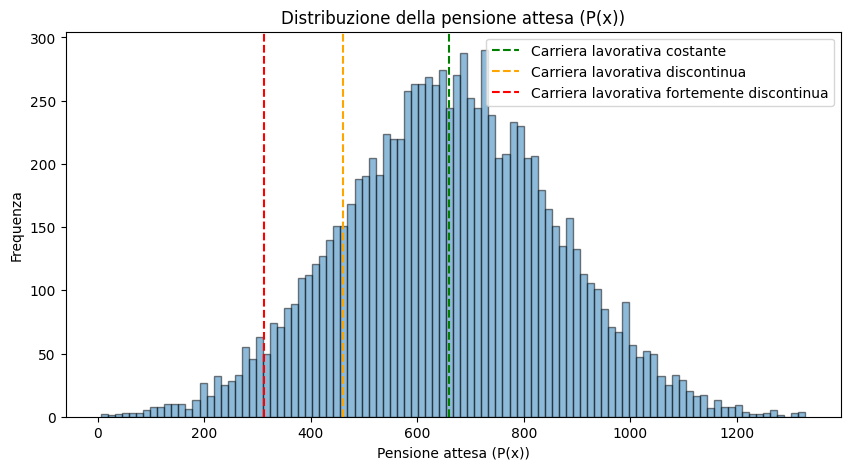

I tuoi anni lavorativi saranno di 39 anni,
Il tuo montante salariale sarà di: 995730.00 euro
Il tuo montante pensionistico complessivo sarà di: 265859.91 euro
Pensione lorda: 858.93
Pensione netta: 661.38


,Pensione attesa (P(x))
0.05,331.0700
0.10,402.5890
0.15,452.1655
0.20,491.6960
0.25,525.1450
0.30,557.1150
0.35,585.1230
0.40,610.6660
0.45,635.0785
0.50,659.7500


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd


def _main_():

    sesso = None
    figli = None
    n_figli = 0

    # Richiedi il sesso (continua a chiedere fino a quando non ricevi un input corretto)
    while sesso not in ['m', 'f']:
        sesso = str(input("Inserisci il tuo sesso (M/F): ").lower())
        if sesso not in ['m', 'f']:
            print('Errore: Devi inserire "M" o "F" per indicare il tuo sesso.')
            n_figli = 0

    # Se il sesso è femminile, chiedi se ha o vuole figli
    if sesso == 'f':
        while figli not in ['si', 'no']:
            figli = str(input('Hai/vorrai figli? (scrivere si o no): ').lower())
            if figli not in ['si', 'no']:
                print('Errore: Devi inserire "si" o "no" per indicare se hai figli.')

        if figli == 'si':
            n_figli = -1
            while n_figli < 0:  # Massimo 2 figli
                n_figli = int(input('Quanti figli hai/vorrai? (max 2): '))
                if n_figli < 0:
                    print("Errore: Il numero di figli deve essere positivo (al più 0)")
                if n_figli > 2:
                    n_figli = 2

    # Richiedi l'età di inizio lavoro (tra 18 e 35 anni)
    eta_inizio = -1
    while eta_inizio < 18 or eta_inizio > 35:
        eta_inizio = int(input("Inserisci l'età in cui hai iniziato/prevedi di iniziare a lavorare (tra 18 e 35 anni): "))
        if eta_inizio < 18 or eta_inizio > 35:
            print('Errore: Devi inserire un\'età compresa tra 18 e 35 anni.')

    # Richiedi la tipologia del lavoratore (autonomo o dipendente)
    tip_lav = None
    while tip_lav not in ['autonomo', 'dipendente']:
        tip_lav = str(input('Sei/ sarai un lavoratore autonomo oppure lavoratore dipendente?').lower())
        if tip_lav not in ['autonomo', 'dipendente']:
            print('Errore: Devi inserire "autonomo" o "dipendente" per indicare la tipologia del lavoratore.')
   
    # Richiedi il numero di mesi di tirocinio
    stage_m = -1
    while stage_m < 0:
        stage_m = int(input("Inserisci il numero di mesi per cui hai svolto un periodo di tirocinio: "))
        if stage_m < 0:
            print("Errore: Il numero di mesi del tirocinio non può essere negativo.")

    #Richiedi il numero di mesi di apprendistato:
    if tip_lav.startswith('a'):
        appr_m = 0
    if tip_lav.startswith('d'):
        appr_m = -1
        while appr_m < 0:
            appr_m = int(input("Inserisci il numero di mesi di apprendistato: "))
            if appr_m < 0:
                print("Errore: Il numero di mesi di apprendistato non può essere negativo.")
            if appr_m > 0:
                frazione_stipendio_appr = int(input('In che percentuale rispetto allo stipendio del tuo profilo professionale? Scrivere la cifra senza %'))
                if frazione_stipendio_appr < 0 or frazione_stipendio_appr > 100:
                    print('Errore: Devi inserire un valore compreso tra 0 e 100. Scrivere la cifra senza %')


    # Richiedi il riscatto degli anni figurativi (massimo 6 anni); utile per l'applicazione della legge Fornero (guarda codice in basso)
    '''
    riscatto_a_fig = -1
    while riscatto_a_fig < 0 or riscatto_a_fig > 6:
        riscatto_a_fig = int(input("Quanti anni figurativi ti sei fatto/vorresti farti riscattare (massimo 6 anni); 3 anni per Laurea Triennale, 2 anni per Laurea Magistrale e 1 anno per il servizio civile universale. Tieni presente che per il riscatto della Laurea il costo per ogni anno è di 5200 euro cca: "))
        if riscatto_a_fig < 0 or riscatto_a_fig > 6:
            print("Errore: Il numero di anni di riscatto deve essere compreso tra 0 e 6. 3 anni per Laurea Triennale, 2 anni per Laurea Magistrale e 1 anno per il servizio civile universale.")
    '''
    # Variabile per memorizzare gli anni contributivi
    a_contrib = 0
    a_lav = 0
    # Ciclo per richiedere l'età pensionabile finché i requisiti non sono soddisfatti
    valid_input = False
    while not valid_input:
        # Richiedi l'età pensionabile
        eta_pensionabile = int(input("Inserisci l'età in cui vorresti andare in pensione: "))
        stage_a = stage_m // 12
        # a_contrib = (eta_pensionabile + riscatto_a_fig + n_figli - stage_a ) - eta_inizio #utile per applicare la legge Fornero
        a_lav = eta_pensionabile - eta_inizio - stage_a

        valid_input = True

    #Qualora volessimo applicare invece la legge Fornero (2011):
    """
        # Variabile per memorizzare gli anni contributivi
    a_contrib = 0
    a_lav = 0
    # Ciclo per richiedere l'età pensionabile finché i requisiti non sono soddisfatti
    valid_input = False
    while not valid_input:
        # Richiedi l'età pensionabile
        eta_pensionabile = int(input("Inserisci l'età in cui vorresti andare in pensione: "))
        stage_a = stage_m // 12
        a_contrib = (eta_pensionabile + riscatto_a_fig + n_figli - stage_a ) - eta_inizio
        a_lav = eta_pensionabile - eta_inizio - stage_a
        
        # Verifica per il sesso maschile
        if sesso == 'm':
            if eta_pensionabile < 71 and a_contrib < 42 + (10 / 12):
                print("Errore: Non hai raggiunto l'età minima necessaria per il periodo contributivo.")
                print("Per un'età inferiore a 71 anni, servono almeno 42 anni e 10 mesi di contributi (Legge Fornero).")
            else:
                valid_input = True  # Requisiti soddisfatti, esci dal ciclo

        # Verifica per il sesso femminile e figli
        if sesso == 'f': 
                if eta_pensionabile < 71 and a_contrib < 41 + (10 / 12):
                    print("Errore: Non hai raggiunto l'età minima necessaria per il periodo contributivo.")
                    print("Per un'età inferiore a 71 anni, servono almeno 41 anni e 10 mesi di contributi (Legge Fornero).")
                else:
                    valid_input = True  # Requisiti soddisfatti, esci dal ciclo
    """
    # Calcola il salario mensile   
    salario = 0
    # Richiesta di input per il salario mensile
    while salario <= 0:
        salario = float(input("Inserisci il tuo salario lordo mensile, oppure il salario ipotetico che prevederai per la tua futura mansione: "))
        if salario <= 0:
            print("Errore: Il salario deve essere un numero positivo.")
    
    salario_annuale = salario * 13.5  # Iniziamo con il salario annuale base, arrotondato a due decimali
    appr_a = appr_m // 12
    a_lav2 = a_lav - appr_a
    montante_salario = 0
    percent_appr = 0.75  # Percentuale per il salario di apprendistato
    salario_appr = round(salario_annuale * percent_appr, 2)  # Salario durante l'apprendistato
    sum_salario = []
    m_salario = []

    # Gestione degli anni di apprendistato
    for i in range(appr_a):
        montante_salario += salario_appr  # Aggiungiamo il salario ridotto al montante
        montante_salario = round(montante_salario, 2)
        sum_salario.append(montante_salario)  # Aggiorniamo il montante totale
        m_salario.append(salario_appr)  # Salario per l'anno di apprendistato

    # Gestione degli anni di lavoro normale
    for i in range(a_lav2):
        # Ogni 3 anni: scatto di anzianità permanente
        if (i + 1) % 3 == 0:  
            scatto_anzianita = 240  # Scatto di anzianità (20 * 12)
            salario_annuale += scatto_anzianita  # Aggiungiamo lo scatto al salario annuale
            salario_annuale = round(salario_annuale, 2)

        # Ogni 5 anni: premio produzione permanente di 2400 euro
        if (i + 1) % 5 == 0:  
            scatto_livello = 1800  # Premio di produzione
            salario_annuale += scatto_livello  # Aggiungiamo il premio al salario annuale
            salario_annuale = round(salario_annuale, 2)

        # Aggiorniamo il montante salariale per l'anno corrente
        montante_salario += salario_annuale
        montante_salario = round(montante_salario, 2)
        sum_salario.append(montante_salario)  # Montante salariale cumulato
        m_salario.append(salario_annuale)  # Salario per l'anno corrente

    # Calcolo IVS
    sum_IVS = []  
    m_IVS = []
    montante_IVS = 0
    aliquota_contrib_dip = 0.33
    aliquota_contrib_aut = 0.267
    aliquota_appr = 0.10 + 0.0584
    aliquota_agevolata = 0.33 / 2

    # Ciclo per i dipendenti con gli anni di apprendistato
    if tip_lav.startswith('d'):
        for i in range(appr_a):
            IVS = round(m_salario[i] * aliquota_appr, 2)
            montante_IVS += IVS
            montante_IVS = round(montante_IVS, 2)
            m_IVS.append(IVS)
            sum_IVS.append(montante_IVS)

        # Ciclo per gli anni di lavoro normale
        for i in range(appr_a, len(m_salario)):
            IVS = round(m_salario[i] * aliquota_contrib_dip, 2)
            montante_IVS += IVS
            montante_IVS = round(montante_IVS, 2)
            m_IVS.append(IVS)
            sum_IVS.append(montante_IVS)

    if tip_lav.startswith('a'):
        for i in range(len(m_salario)):
            IVS = round(m_salario[i] * aliquota_contrib_aut, 2)
            montante_IVS += IVS
            montante_IVS = round(montante_IVS, 2)
            m_IVS.append(IVS)
            sum_IVS.append(montante_IVS)

    # Creiamo un array a due righe con m_salario e m_IVS usando un ciclo con enumerate
    array_salario_IVS = []
    for i, (salario, ivs) in enumerate(zip(m_salario, m_IVS)):
        array_salario_IVS.append([salario, ivs])

    # Dati forniti
    array_coeff_tr = np.array([0.042, 0.0434, 0.0414, 0.04532, 0.04657, 0.0479, 0.04910, 0.0506, 0.0522, 0.05391, 0.0575])
    array_anni = np.arange(61, 72)

    #for index,(array_anni, array_coeff_tr) in enumerate(zip(array_anni, array_coeff_tr)): #utile per vedere la progressione del proprio montante IVS
    #    print([array_anni,array_coeff_tr])

    index_eta_pensionabile = np.where(array_anni == eta_pensionabile)[0][0]
    coeff = array_coeff_tr[index_eta_pensionabile] 

    # Calcola la pensione iniziale (prima della tassazione)
    pensione_def_lorda = round((coeff * montante_IVS) / 13,2)
    #print(pensione_def_lorda)
    # Applica il sistema di tassazione a 4 scaglioni
    if pensione_def_lorda <= 1250:
        pensione_def_netta = round(pensione_def_lorda - (pensione_def_lorda * 0.23), 2)
    if 1250 < pensione_def_lorda <= 2333.33:
        pensione_def_netta = round(pensione_def_lorda - 287.5 - ((pensione_def_lorda - 1250) * 0.25), 2)
    if 2333.33 < pensione_def_lorda <= 4166.67:
        pensione_def_netta = round(pensione_def_lorda - 558.33 - ((pensione_def_lorda - 2333.33) * 0.35), 2)
    if pensione_def_lorda > 4166.67:
        pensione_def_netta = round(pensione_def_lorda - 1199.99 - ((pensione_def_lorda - 4166.67) * 0.43), 2)

    # pensione_def_netta

    # Simulazione Monte Carlo
    pensione_def_netta_std = 200
    outputs = []
    n_iter = 10000
    for i in range(n_iter):
        montecarlo = -1  # Inizializza la variabile con un valore negativo
        while montecarlo < 0:  # Continua fino a che il valore di Monte Carlo è positivo
            montecarlo = round(rd.normalvariate(pensione_def_netta, pensione_def_netta_std),2)
        outputs.append(montecarlo)  # Aggiungi solo valori positivi alla lista

    # Stampa i risultati
    #outputs

    df = pd.DataFrame()
    df['Pensione attesa (P(x))'] = outputs

    plt.figure(figsize=(10,5))
    plt.hist(df['Pensione attesa (P(x))'], bins=100, edgecolor='black', alpha = 0.5)
    plt.title('Distribuzione della pensione attesa (P(x))')

    media = df['Pensione attesa (P(x))'].mean()
    media_2 = df['Pensione attesa (P(x))'].mean() - df['Pensione attesa (P(x))'].std()
    media_3 = df['Pensione attesa (P(x))'].mean() - 1.75 * df['Pensione attesa (P(x))'].std()
    plt.axvline(x = media , color = 'green', linestyle='--',linewidth = 1.5, label = 'Carriera lavorativa costante')
    plt.axvline(x = media_2, color = 'orange', linestyle='--', linewidth = 1.5, label = 'Carriera lavorativa discontinua')
    plt.axvline(x = media_3, color = 'red', linestyle='--', linewidth = 1.5, label = 'Carriera lavorativa fortemente discontinua')
    plt.xlabel('Pensione attesa (P(x))')
    plt.ylabel('Frequenza')
    plt.legend()
    plt.show()

    percent = [i/20 for i in range(1,20)]
    percent
    df.quantile(percent)

    # df.style.format().background_gradient(cmap='RdYlGn', subset='Pensione attesa (P(x))')

    print(f'I tuoi anni lavorativi saranno di {a_lav:.0f} anni,')
    #print(f'mentre gli anni contributivi di {a_contrib:.0f} anni.' ) #legge Fornero
    print(f'Il tuo montante salariale sarà di: {montante_salario:.2f} euro')
    print(f'Il tuo montante pensionistico complessivo sarà di: {montante_IVS} euro')
    print("Pensione lorda:", pensione_def_lorda)
    print("Pensione netta:", pensione_def_netta)

    return df.quantile(percent)
    #pensione_def_netta, len(array_salario_IVS), array_salario_IVS
    
_main_()
